In [26]:
import re
from PyPDF2 import PdfReader
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


In [64]:
# Read PDF
reader = PdfReader("PND_2019.pdf")
# Extract text from pdf
text = ""
i = 0
for page in reader.pages:
    text += page.extract_text()

In [65]:
# Clean text (remove special characters)

cleaned_text = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]', '', text)
words = text.lower().split()

In [ ]:
# Filter words that are not in the stopwords list

from stop_words import get_stop_words #The words we want to ignore
stop_words_es = get_stop_words('es') #Spanish StopWords
stopwords = ["entre","uso","país","méxico","sus","más","hacia","sobre","sector","manera","mexico","país","lo","como","no","nos","si","e","así","asi","2030","al",
             "nacional","agenda","y", "la", "el", "los", "en", "de", "del", "por", "para","con", "que","a", "las", "para", "es", "un", "una", "que", "se", 
             "su","también","asimismo","mediante", "este", "ha", "será", "través", "además", "son", "o", "esto", "habrá", "mayor", "desde", "ya",
             "sin", "cada", "ello", "debe","muy","nadie","esta","donde","-","federal","mil","han","fue","ción","hasta","ser","ese","esa","sino","ante","está","ni",
             "les","cuales","re","sido"]
filtered_words = [word for word in words if word not in stopwords]
word_counts=Counter(filtered_words)


#### Result on the Word Cloud

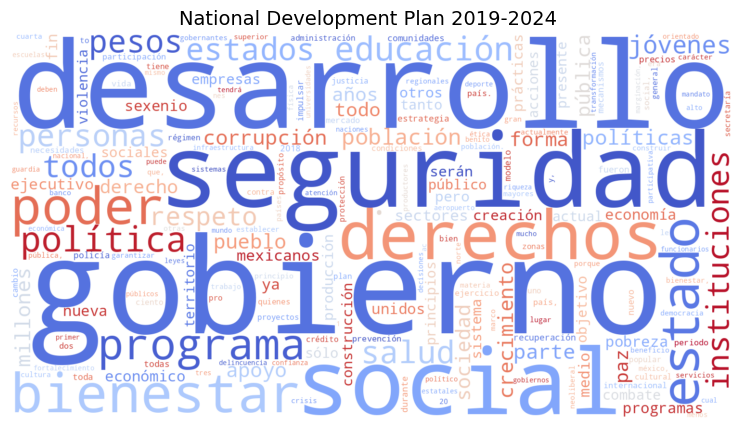

In [70]:
# Count the frequency of each word word_counts

wordcloud = WordCloud(
    width=1500, height=800, 
    background_color="white", 
    colormap="coolwarm", 
    random_state=42
).generate_from_frequencies(word_counts)

# Generate the graph
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("National Development Plan 2019-2024 ", fontsize=14)
plt.show()

#### The 10 most mentioned words in the PND 2019-2024

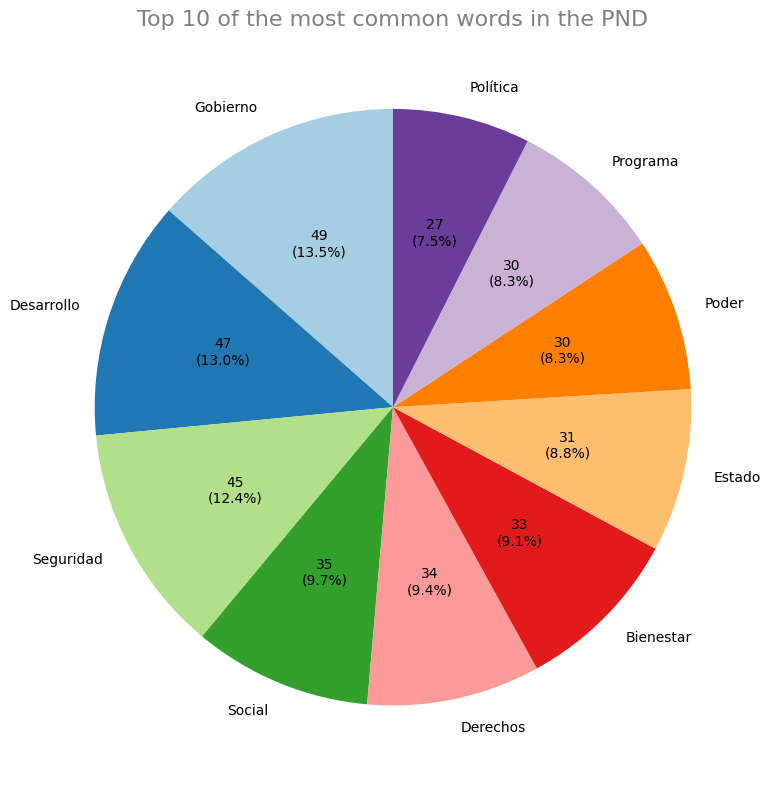

In [71]:

# Get the top ten 
most_common_words = word_counts.most_common(10) 

# Separate the words, and make the counts with format
uniqu_words, counts = zip(*most_common_words)
words2 = uniqu_words
words2 = [f"{item.capitalize()}" for idx, item in enumerate(uniqu_words, 1)]

# Generate the graph
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=words2, autopct=lambda pct: f"{int(pct / 100. * sum(counts))}\n({pct:.1f}%)", 
        startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 of the most common words in the PND', fontsize=16,color='gray')
plt.tight_layout()
plt.show()

### Analysis of words of importance for a democratic state

In [72]:

def compound_word(words_all, combination):
    """
    Function that takes a list of words and a list of compound,
    and returns a dictionary with the compound words found and their number of repetitions.
    
    Parameters:
    words (list): List of individual words.
    compound_combinations (list): List of word  that you consider compound.
    
    Returns:
    dict: Dictionary with compound words as keys and the number of repetitions as values.
    """
    
    # Join the words in the list into a single string for easy searching
    texto = ' '.join(words_all)

    # Dictionary to store compound words and their counter, we initialize with 0
    contador = {comb: 0 for comb in combination}
    #iteration on the combinations and we look for them in the text
    
    for com in combination:
        # Count how many times the combination appears
        ocurrencias = texto.count(com)
        
        if ocurrencias > 0:
            contador[com] +=  ocurrencias
            # Combinations found are removed from the text to prevent them from being repeated
    return dict(contador)
   

In [73]:
# Practice case
combination = ['transparencia','cambio climático','indicadores','energías limpias','justicia social',
                            'derechos humanos','crecimiento económico','tecnología','innovación','equidad','inclusivo']
resultado = compound_word(filtered_words, combination)

#### Words of relevance and their repetition within the PND 2019-2024 

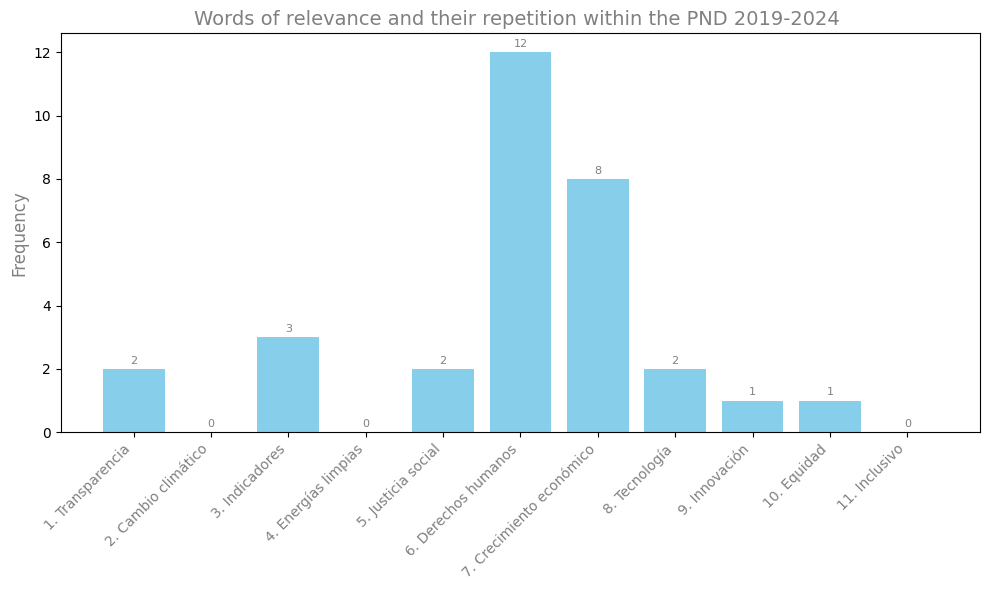

In [74]:
#extract keys and values ​​from dictionary
keys = list(resultado.keys())
values = list(resultado.values())

# Create a new list with consecutive numbers at the beginning and the first letter capitalized
keys2 = [f"{idx}. {item.capitalize()}" for idx, item in enumerate(keys, 1)]


# generate the graph
plt.figure(figsize=(10, 6)) 
bars = plt.bar(keys2, values, color='skyblue')

plt.title('Words of relevance and their repetition within the PND 2019-2024 ', fontsize=14,color='gray')
plt.xlabel('', fontsize=14)
plt.ylabel('Frequency', fontsize=12, color='gray')

# Rotate x-axis labels so they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10, color='gray')

# includes rep labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), 
             ha='center', va='bottom', fontsize=8, color ='gray')
    
# Adjust the spacing so that the labels do not get cut off
plt.tight_layout()
plt.show()

#### Summary

In [115]:
formatted_number = f"{len(words):,}"

print('Total words analyzed from the PND 2019-2024: ',formatted_number)

Total words analyzed from the PND 2019-2024:  19,318


In [ ]:
def convert_dicc_to_df(dicc_gral, colum_desc, colum_count):
    """
    Converts a dictionary to a pandas DataFrame, formats the columns and adds a numeric index.

    Args:
        dictionary: The dictionary to convert.
        column_name: The name of the column for the dictionary keys.
        new_column_name: The name of the new column with the desired format.

    Returns:
        A Pandas DataFrame with the columns formatted.
    """

    df = pd.DataFrame({colum_desc: dicc_gral.keys(), colum_count: dicc_gral.values()})
    df['Nummber'] = df.index + 1
    df[colum_desc] = df['Nummber'].astype(str) + '. ' + df[colum_desc].str.title()
    df = df.drop('Nummber', axis=1)
    return df

In [ ]:
df_most_commun = convert_dicc_to_df(dict(word_counts.most_common(10)), 'Words most commun', 'Count')
df_desire = convert_dicc_to_df(dict(resultado), 'Words of importance', 'Count')


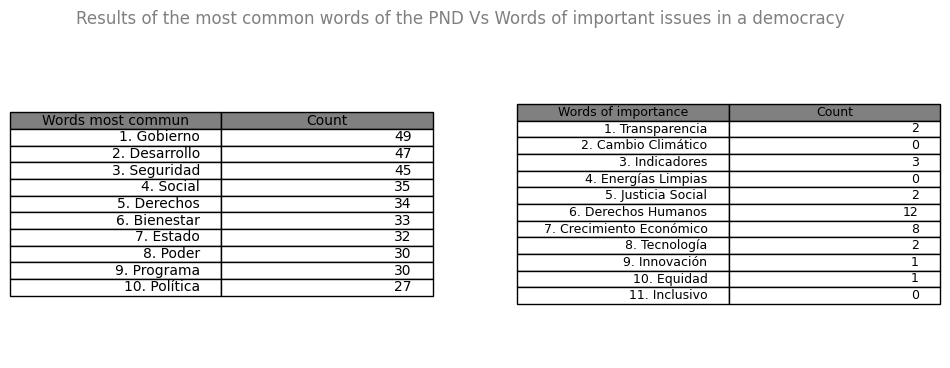

In [124]:


# Create figures and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Show DataFrames in subplots
ax1.table(cellText=df_most_commun.values, colLabels=df_most_commun.columns, colColours=['gray', 'gray'], loc='center', fontsize=12)
ax2.table(cellText=df_desire.values, colLabels=df_desire.columns, colColours=['gray', 'gray'], loc='center', fontsize=12)



# Hide subplot axes
ax1.axis('off')
ax2.axis('off')

# Set title using suptitle (centered by default)
plt.suptitle('Results of the most common words of the PND Vs Words of important issues in a democracy', fontsize=12, color='gray')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()